<b>Aktywność 9</b><br>
Niezbędne biblioteki: contextily, geopandas, matplotlib

<b>Ćwiczenie 1.</b> Wczytaj dane z plików ``TravelTimes_to_5975375_RailwayStation.shp``, ``metro.shp`` i ``roads.shp`` do obiektów typu GeoDataFrame o nazwach grid, metro i roads.

In [107]:
import geopandas as gpd

### your code ###
grid = gpd.read_file('TravelTimes_to_5975375_RailwayStation/TravelTimes_to_5975375_RailwayStation.shp')
metro = gpd.read_file('metro/metro.shp')
roads = gpd.read_file('roads/roads.shp')

print(grid.head())
print(metro.head())
print(roads.head())

   car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   
2    30133       50    31872       56  5785642   32940     121      146   
3    32690       54    34429       60  5785643   33233     125      150   
4    31872       42    31834       48  5787544   32127     109      126   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   
2   32940     113      133  5975375   29626     423   
3   33233     117      144  5975375   29919     427   
4   32127     101      121  5975375   31674     452   

                                            geometry  
0  POLYGON ((382000 6697750, 381750 6697750, 3817...  
1  POLYGON ((382250 6697750, 382000 6697750, 3820...  
2  POLYGON ((382500 6697750, 382250 6697750, 3822... 

<b>Ćwiczenie 2.</b> Sprawdź, czy wszystkie wartości CRS są identyczne. Jeżeli nie, to ujednolić je do wartości CRS ze zmiennej grid.

In [108]:
### your code ###
grid_crs = grid.crs
metro_crs = metro.crs
roads_crs = roads.crs

if grid_crs != metro_crs:
    metro = metro.to_crs(grid_crs)
if grid_crs != roads_crs:
    roads = roads.to_crs(grid_crs)
    
print(f"Grid CRS: {grid_crs}")
print(f"Metro CRS: {metro_crs}")
print(f"Roads CRS: {roads_crs}")


Grid CRS: EPSG:3067
Metro CRS: EPSG:2392
Roads CRS: EPSG:2392


<b>Ćwiczenie 3.</b> Narysuj wykres na podstawie danych ze zmiennej grid.

<Axes: >

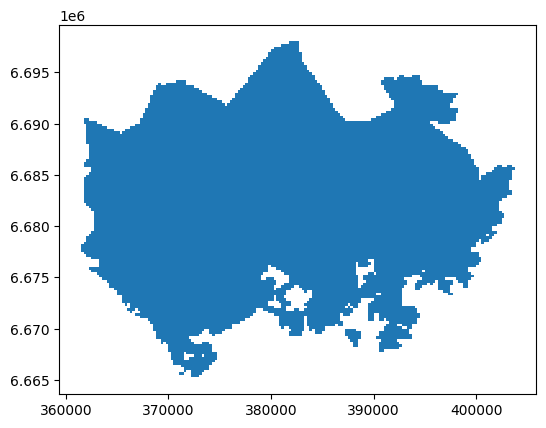

In [109]:
### your code ###
grid.plot()


<b>Ćwiczenie 4.</b> Narysuj wykres na podstawie kolumny pt_r_t ze zmiennej grid.

<Axes: >

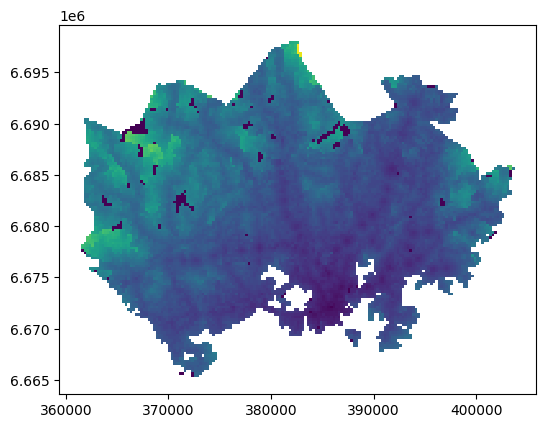

In [110]:
### your code ###
grid.plot(column='pt_r_t')

<b>Ćwiczenie 5.</b> Ustaw mapę kolorów Spectral.

<Axes: >

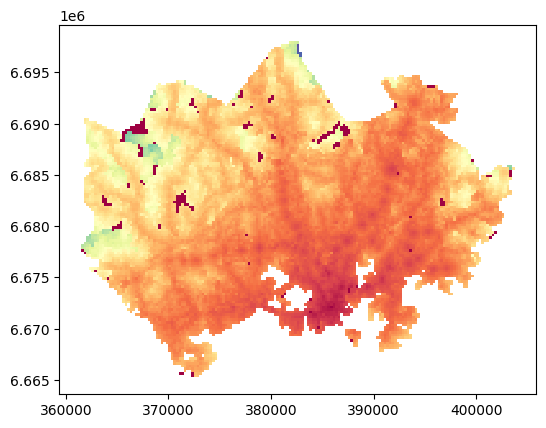

In [111]:
### your code ###
grid.plot(column='pt_r_t', cmap='Spectral')

<b>Ćwiczenie 6.</b> Ustaw podział danych na wykresie (klasyfikację) według kwantyli.

<Axes: >

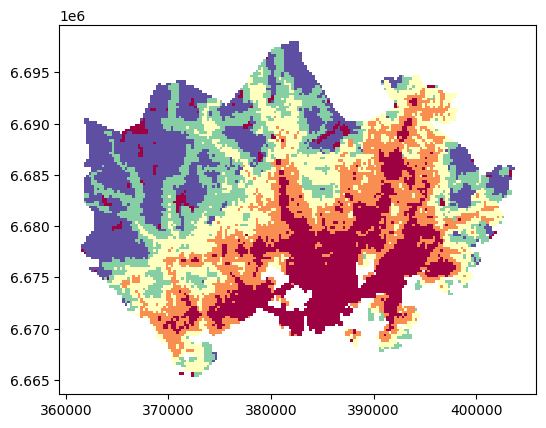

In [112]:
### your code ###
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles')


<b>Ćwiczenie 7.</b> Ustaw liczbę klas na 9.

<Axes: >

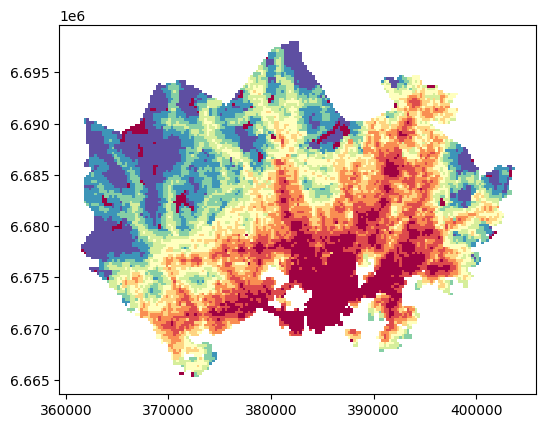

In [113]:
### your code ###
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9)


<b>Ćwiczenie 8.</b> Ustaw przezroczystość wykresu na 0.8.

<Axes: >

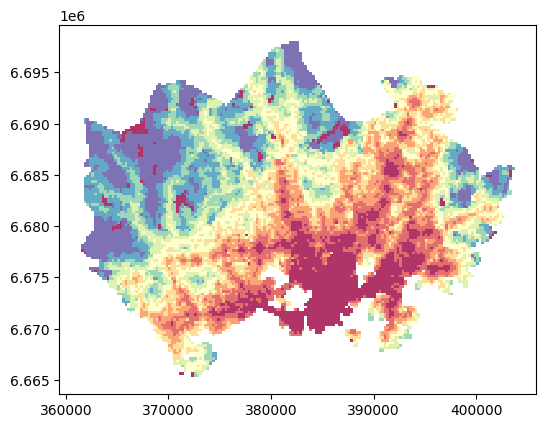

In [114]:
### your code ###
grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8)

<b>Ćwiczenie 9.</b> Nanieś na jednym wykresie dane ze zmiennych grid, roads oraz metro. Metro zaznacz czerwonymi liniami o grubości 2, a drogi czarnymi liniami o grubości 1.

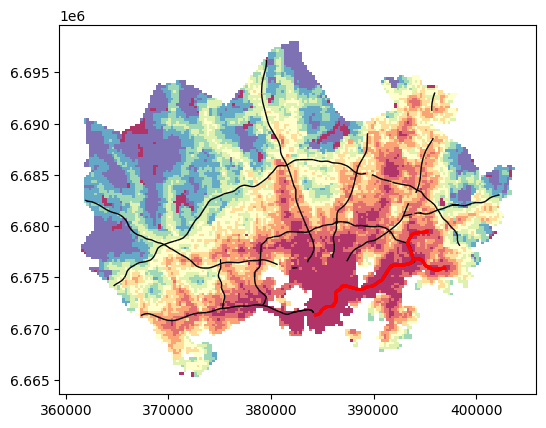

In [115]:
import matplotlib.pyplot as plt

### your code ###
ax = grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8)
roads.plot(ax=ax, color='black', linewidth=1)
metro.plot(ax=ax, color='red', linewidth=2)
plt.show()

<b>Ćwiczenie 10.</b> Wyświetl legendę. Nadaj jej tytuł "Travel time (minutes)".

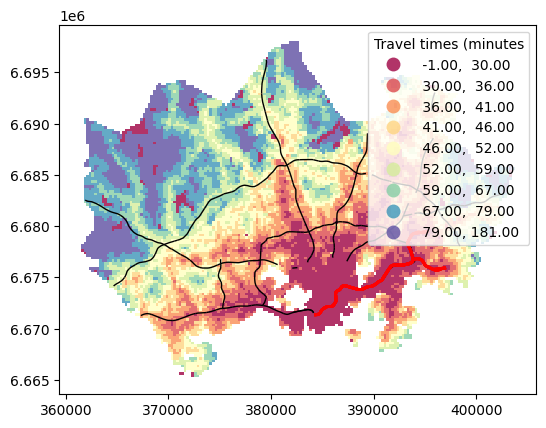

In [116]:
### your code ###
ax = grid.plot(column='pt_r_t', cmap='Spectral', scheme='quantiles', k=9, alpha=0.8, legend=True)
roads.plot(ax=ax, color='black', linewidth=1)
metro.plot(ax=ax, color='red', linewidth=2)
ax.get_legend().set_title('Travel times (minutes')
plt.show()

<b>Ćwiczenie 11.</b> Przeprowadź projekcję danych ze zmiennej grid na EPSG:3857 (Web Mercator).

In [117]:
### your code ###
grid = grid.to_crs(epsg=3857)

<b>Ćwiczenie 12.</b> Nanieś na wykresie dane z kolumny pt_r_t ze zmiennej grid. Ustaw mapę kolorów RdYlBu, podział danych na wykresie (klasyfikację) według kwantyli, liczbę klas na 9 oraz przezroczystość wykresu na 0.8.

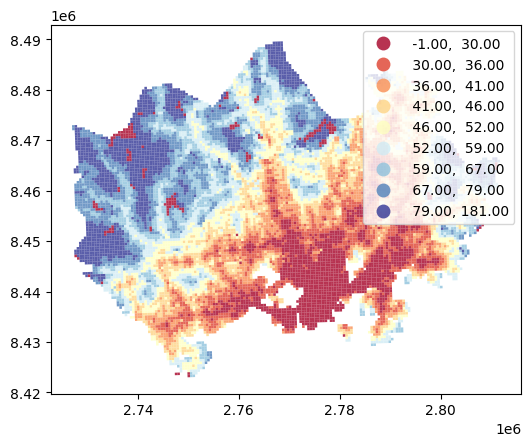

In [127]:
### your code ###
grid.plot(column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.8, legend=True)
ax.get_legend().set_title('Travel times (minutes')
plt.show()

<b>Ćwiczenie 13.</b> Dodaj mapę bazową OpenStreetMap (Mapnik).

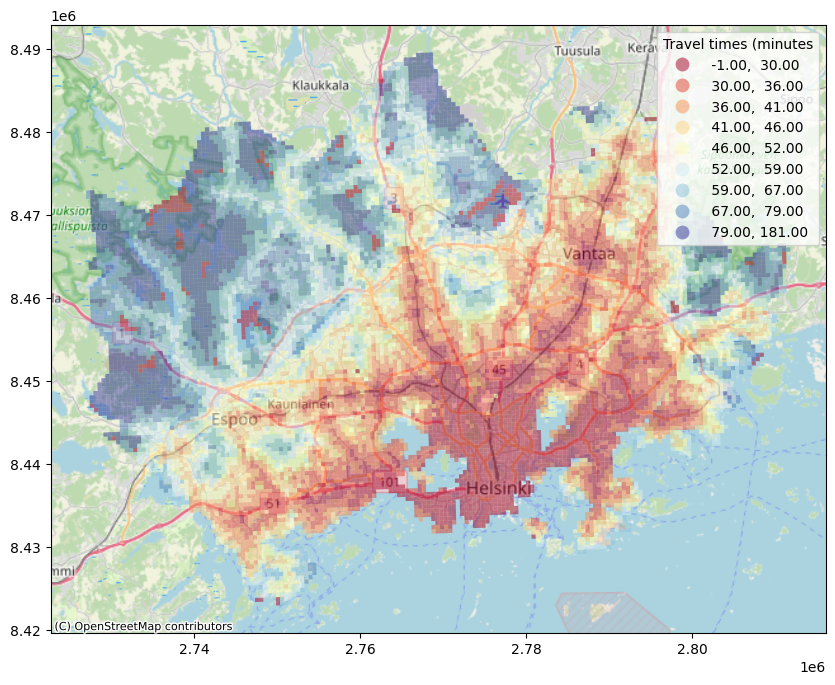

In [137]:
import contextily as ctx

### your code ###
ax = grid.plot(figsize=(10,10), column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=9, alpha=0.5, legend=True)
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.get_legend().set_title('Travel times (minutes')
plt.show()

<b>Ćwiczenie 14.</b> Wybierz tylko te rekordy ze zmiennej grid, które w kolumnie pt_r_t mają wartości od 0 do 15 i zapisz je w zmiennej grid2.

In [131]:
### your code ###
grid2 = grid[(grid['pt_r_t'] >= 0) & (grid['pt_r_t'] <= 15)]
print(grid2.head())

       car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
10597     6056       22     6056       24  5951180    3645      12       16   
10598     5367       15     5366       17  5951181    3831      15       20   
10727     5381       17     5144       18  5952975    3569      11       15   
10855     5130       14     5130       16  5954765    3785      14       18   
11006     8293       18     8299       20  5956572    6712      14       17   

       pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
10597    3645      12       17  5975375    3745      53   
10598    3831      15       20  5975375    3825      55   
10727    3569      11       16  5975375    3566      51   
10855    3785      14       18  5975375    3300      47   
11006    6712      14       16  5975375    6745      96   

                                                geometry  
10597  POLYGON ((2775694.688 8444448.567, 2775193.037...  
10598  POLYGON ((2776196.342 8444464.276, 2775694.68

<b>Ćwiczenie 15.</b> Nanieś na wykresie dane z kolumny pt_r_t ze zmiennej grid2. Ustaw mapę kolorów RdYlBu, podział danych na wykresie (klasyfikację) według kwantyli, liczbę klas na 5 oraz przezroczystość wykresu na 0.6. Dodaj mapę bazową OpenStreetMap (Mapnik).

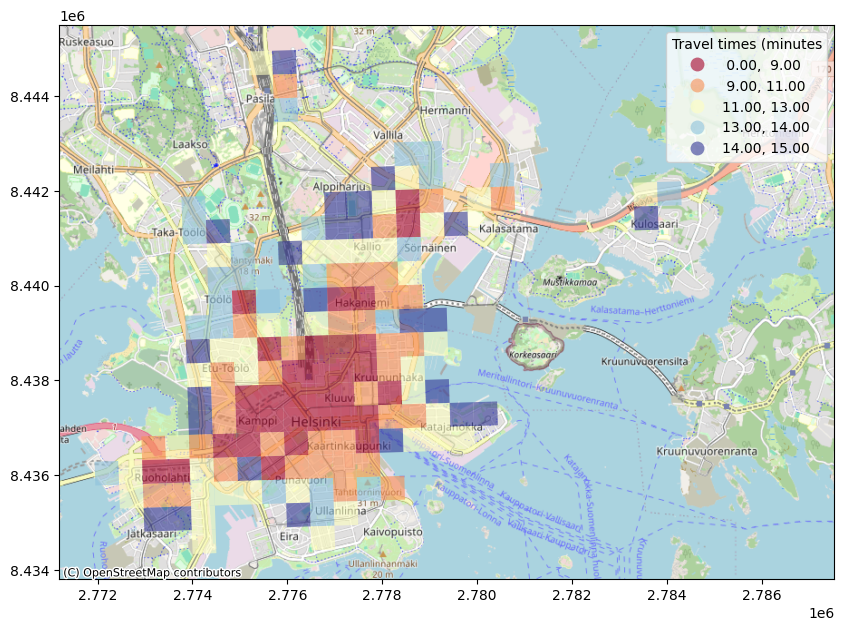

In [138]:
### your code ###
ax = grid2.plot(figsize=(10,10),column='pt_r_t', cmap='RdYlBu', scheme='quantiles', k=5, alpha=0.6, legend=True)
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.get_legend().set_title('Travel times (minutes')
plt.show()